In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn

## Medical Cost Personal Dataset
- https://www.kaggle.com/mirichoi0218/insurance

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/skku/2021-1 Machine Learning/insurance.csv')

- features : age, sex, bmi, children(자녀 수), smoker(흡연여부), region, charges
- 이러한 피처에 따라 보험 비용을 예측

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 간단한 분석

- sex와 smoker는 문자열로 되어있으므로 수로 바꿔줌
- sex : male(0), female(1)
- smoker : not smoke(0), smoke(1)

In [6]:
sex = df['sex'].tolist()
smoke = df['smoker'].tolist()

In [7]:
sex = [1 if s=='female' else 0 for s in sex]
df['sex'] = sex

In [8]:
smoke = [1 if s=='yes' else 0 for s in smoke]
df['smoker'] = smoke

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


- region은 의료비 분석에 영향을 주지 않을 것이라는 생각에 삭제

In [10]:
df = df.drop(['region'], axis=1)

- matplotlib을 이용해 피처별 통계 시각화

In [11]:
import matplotlib.pyplot as plt

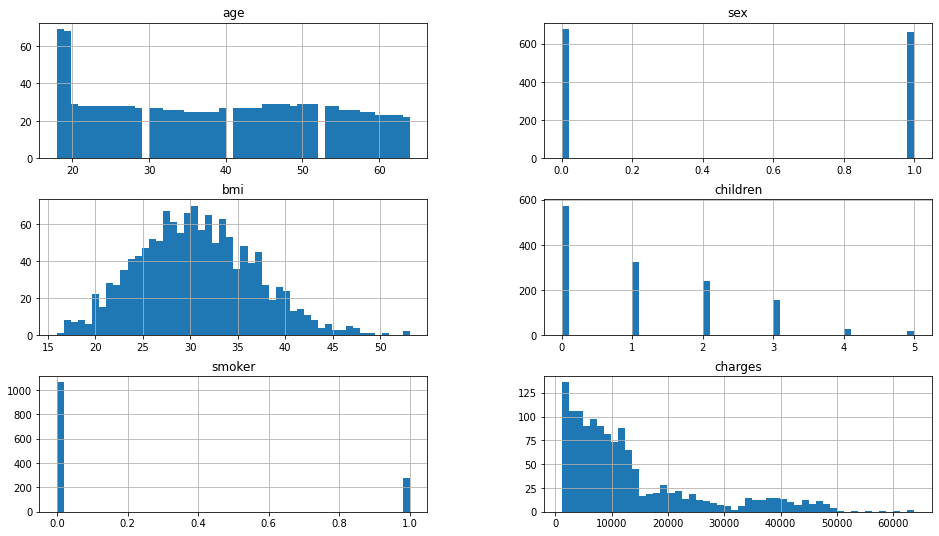

In [12]:
df.hist(bins=50, figsize=(16,9))
plt.show()

- 평균

In [13]:
df['age'].mean() #데이터의 평균 나이

39.20702541106129

In [14]:
df['sex'].mean() #0이 남성이고, 1이 여성이므로, 남성이 여성보다 근소하게 더 많은 것을 알 수 있다.

0.4947683109118087

In [15]:
df['bmi'].mean() #데이터의 평균 bmi

30.663396860986538

In [16]:
df['children'].mean() #데이터의 평균 자녀 수

1.0949177877429

In [17]:
df['smoker'].mean() #0이 비흡연자, 1이 흡연자이므로, 비흡연자가 훨씬 많은 것을 알 수 있다.

0.20478325859491778

In [18]:
df['charges'].mean() #데이터의 평균 의료비

13270.422265141257

- 상관관계 분석
- 자녀 수와 성별은 의료비와 상관관계가 거의 없다. 가장 상관관계가 큰 피처는 의외로 흡연 여부였다.

In [19]:
cor = df.corr()
cor['charges']. sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex        -0.057292
Name: charges, dtype: float64

## Linear Regreesion

- X, y로 나누어주고, test, train 데이터 나누어줌.

In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.to_numpy()

array([[46.   ,  1.   , 19.95 ,  2.   ,  0.   ],
       [47.   ,  1.   , 24.32 ,  0.   ,  0.   ],
       [52.   ,  1.   , 24.86 ,  0.   ,  0.   ],
       ...,
       [58.   ,  0.   , 25.175,  0.   ,  0.   ],
       [37.   ,  1.   , 47.6  ,  2.   ,  1.   ],
       [55.   ,  0.   , 29.9  ,  0.   ,  0.   ]])

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 5) (268, 5) (1070, 1) (268, 1)


- standardscaler를 이용한 데이터 전처리

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = lr.predict(X_test) #예측

In [27]:
from sklearn.metrics import mean_squared_error #회귀이기 때문에 오류가 어느정도인지를 보여주는 metrics

In [28]:
mse = mean_squared_error(y_test.to_numpy().ravel(), y_pred.ravel())
mse = np.sqrt(mse)
mse

5829.17293025419

- 0에 가까워야 정확한 것인데, 5829가 나왔다.

- 시각화해서보면, 2000 전에 나타난 데이터들은 거의 0에 수렴하는 모습을 보인다. 즉, 오류율이 적은 편이었다. 그러나 2000이상의 데이터들은 다소 그 전 데이터들보다 오류가 높은 것을 볼 수 있다.

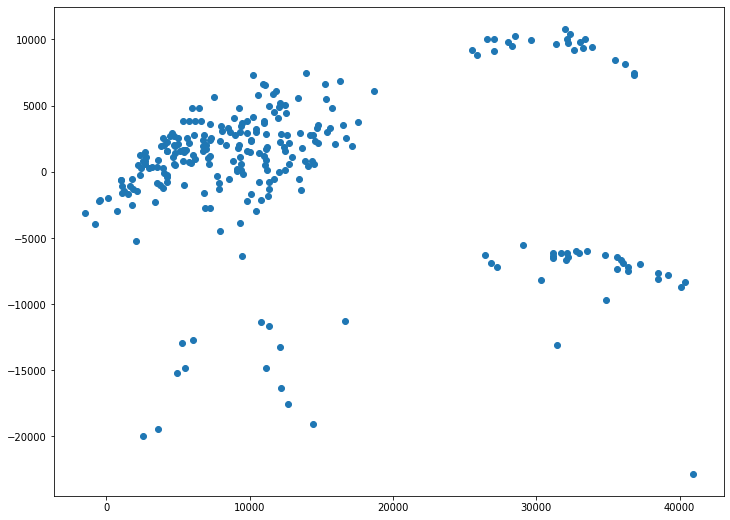

In [29]:
plt.figure(figsize = (12,9))
plt.scatter(y_pred, y_pred-y_test)
plt.show()